## Task 2: Line Detection Using Hough Trans
form (20 Marks)
* (a) Write a function to detect and highlight straight lines in an image
 using the Hough Line Transform. Make sure to use the Canny edge
 detector to preprocess the image before applying the Hough Transform.
 (10 Marks)
* (b) Test your function on an image with clear straight lines, such as a
 road, building, or grid structure. Display the original image and the
 processed image with highlighted lines. (5 Marks)
* (c) Experiment with different threshold parameters in the Hough Trans
form to optimize line detection. In 2-3 sentences, describe the param
eter changes and how they affected the results. (5 Marks)

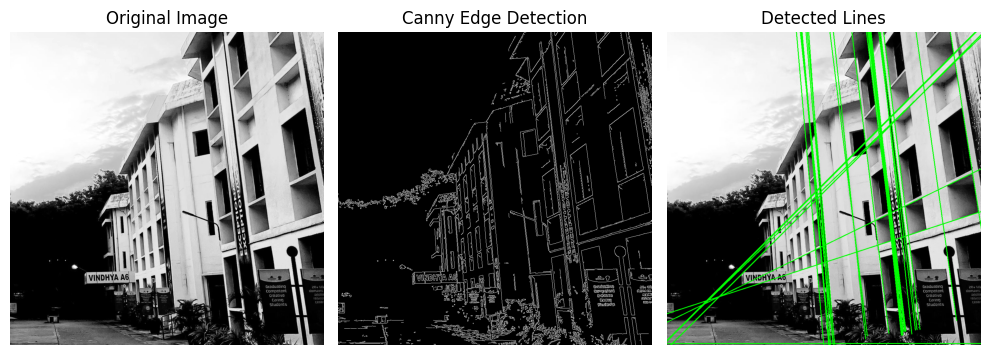

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def detect_lines(image, canny_threshold1=150, canny_threshold2=250, hough_threshold=210):
   
    
    # Apply Canny edge detection
    edges = cv2.Canny(image, canny_threshold1, canny_threshold2)

    # Convert to a color image to draw colored lines
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Apply the Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi/180, hough_threshold)
    
    # Draw the lines on the image
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(color_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Lines')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load a grayscale image
image = cv2.imread('data/building.jpeg', cv2.IMREAD_GRAYSCALE)
detect_lines(image)


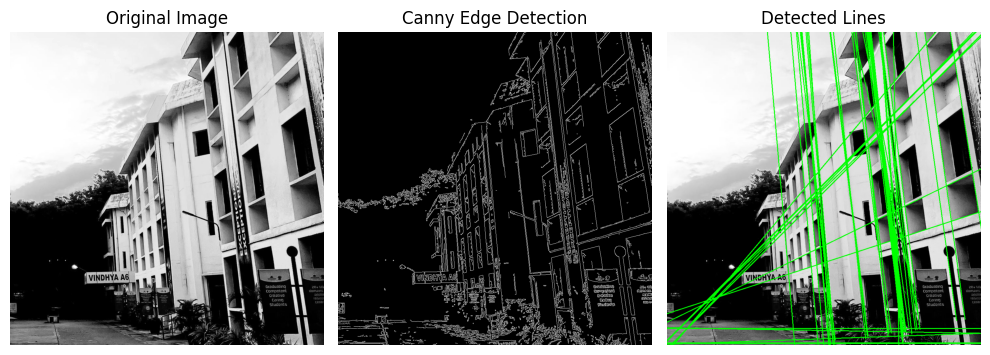

In [5]:
detect_lines(image, canny_threshold1=100, canny_threshold2=200, hough_threshold=200)

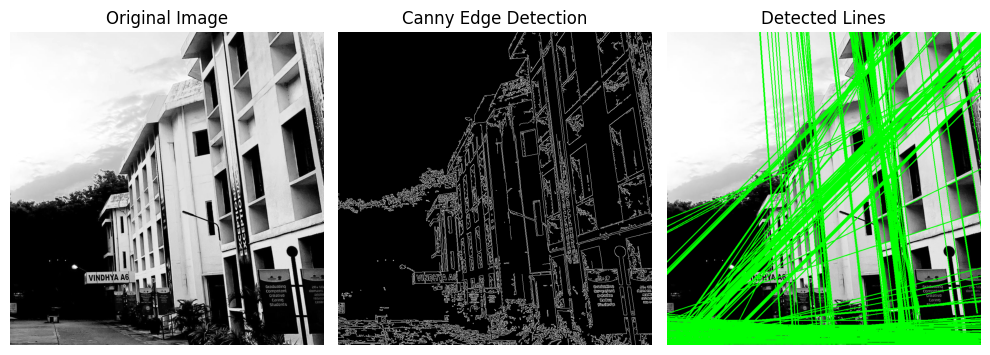

In [6]:
detect_lines(image, canny_threshold1=50, canny_threshold2=150, hough_threshold=200)

- Decreasing the Canny edge thresholds typically results in more detected edges but can introduce noise.
- Increasing the Hough Transform threshold makes the algorithm more selective, detecting only the most prominent lines but possibly missing some.
- Fine-tuning these parameters is necessary to balance noise reduction with accurate line detection.